In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import KFold
from gosdt.model.gosdt import GOSDT
from gosdt.model.threshold_guess import compute_thresholds, cut 

Agreement 1) This assignment represents my own work. I did not work on this assignment with others. All coding was done by myself.

Agreement 2) I understand that if I struggle with this assignment that I will reevaluate whether this is the correct class for me to take. I understand that the homework only gets harder.

### Exercise 1

1. ranking 
2. classification - based on image, classify type of galaxy
3. regression - based on characteristics, predict salary 
4. regression - based on historical data, predict lbs of veggies 
5. pattern mining - find patterns between clothing product sales to understand trends
6. density estimation - to get distribution of data 
7. conditional probability estimation - use features of customers to estimate probability of sale 
8. conditional probability estimation - use features to estimate probabiltiy of default 
9. conditional probability estimation - use MRI scans to estimate probability of tumor 
10. clustering - calc distance based on genetic data to cluster species together 

### Exercise 2

#### Part 1

$$ KL(P,Q) = \sum_{a \in \mathcal{O}} P(a) log(\frac{P(a)}{Q(a)}) $$
$$ = \sum_{a \in \mathcal{O}} P(a) \cdot -log(\frac{Q(a)}{P(a)}) $$
When $f(a) = -log(\frac{Q(a)}{P(a)}) $ and $ E(f(a)) = \sum_a P(a)f(a) $:
$$ = E[-log(\frac{Q(a)}{P(a)})]  $$

Given $-log$ is a convex function, by Jensen's inequality:
$$ = E[-log(\frac{Q}{P(a)})]  \geq -logE[(\frac{Q}{P(a)})] $$
$$ \geq -log(\sum_a P(a) \cdot \frac{Q(a)}{P(a)})  $$
$$ \geq -log(1)  $$
$$ \geq 0 $$ 

Therefore:
$$ KL(P,Q) = \sum_{a \in \mathcal{O}} P(a) log(\frac{P(a)}{Q(a)}) \geq 0 $$

#### Part 2

$$ KL(P,Q) = \sum_{a \in \mathcal{O}} P(a) log(\frac{P(a)}{Q(a)}) $$

If P & Q are from the same distribution, then $ P(a) = Q(a) $
$$ = \sum_{a \in \mathcal{O}} p(a)log(1) = \sum_{a \in \mathcal{O}} p(a)\cdot 0 = 0 $$

#### Part 3

Using $ P \sim Bern(0.2)$ and $Q \sim Bern(0.5)$:

$$KL(P,Q) = \sum_{a \in [0,1]} P(a) log(\frac{P(a)}{Q(a)}) $$
$$ = P(0)\cdot log(\frac{P(0)}{Q(0)}) + P(1) \cdot log(\frac{P(1)}{Q(1)}) $$
$$ = 0.8 \cdot log(\frac{0.8}{0.5}) + 0.2 \cdot log(\frac{0.2}{0.5}) $$
$$KL(P,Q) \approx 0.1927 $$

$$KL(Q,P) = \sum_{a \in [0,1]} Q(a) log(\frac{Q(a)}{P(a)}) $$
$$ = Q(0)\cdot log(\frac{Q(0)}{P(0)}) + Q(1) \cdot log(\frac{Q(1)}{P(1)}) $$
$$ = 0.5 \cdot log(\frac{0.5}{0.8}) + 0.5 \cdot log(\frac{0.5}{0.2})$$
$$KL(Q,P) \approx 0.2231 $$

We can see from the above values that empirically $ KL(P,Q) \neq KL(Q,P)$

#### Part 4

$$ H(X) - H(X \mid Y) $$
Rewriting using the expressions from instructions:
$$ = \sum_{i=1}^n -P(x_i)logP(x_i)- \sum_{i=1}^n\sum_{j=1}^m -P(x_i, y_j)log(\frac{P(x_i, y_j)}{P(y_j)}$$
$$ = - \sum_{i=1}^n P(x_i)logP(x_i) + \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j)[logP(x_i, y_j) - logP(y_j)]$$
$$ = - \sum_{i=1}^n P(x_i)logP(x_i) + \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j)logP(x_i, y_j) - \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j)logP(y_j)$$

Given $ P(x_i) = \sum_{j=1}^m P(x_i, y_j)$ by definition of marginal probability:
$$ = - \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j)logP(x_i)+ \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j)logP(x_i, y_j) - \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j)logP(y_j)$$

$$ = - \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j) [ logP(x_i) + logP(y_j) - log P(x_i, y_j)] $$
$$ = - \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j) log(\frac{P(x_i)P(y_j)}{P(x_i, y_j)})$$
$$ = \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j) log(\frac{P(x_i, y_j)}{P(x_i)P(y_j)})$$
This is in the form of KL divergence for $KL((X,Y), XY) = KL(J, PQ) $

#### Part 5

$$ H(Y) - H(Y \mid X) $$
Rewriting using the expressions from instructions:
$$ = \sum_{j=1}^m -P(y_j)logP(y_j)- \sum_{i=1}^n\sum_{j=1}^m -P(x_i, y_j)log(\frac{P(x_i, y_j)}{P(x_i)}$$
$$ = - \sum_{j=1}^m P(y_j)logP(y_j) + \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j)logP(x_i, y_j) - \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j)logP(x_i)$$

Given $ P(y_j) = \sum_{i=1}^n P(x_i, y_j)$:
$$ = - \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j)logP(y_j)+ \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j)logP(x_i, y_j) - \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j)logP(y_j)$$

$$ = \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j) [ -logP(y_j) + log P(x_i, y_j) - logP(x_i)] $$
$$ = \sum_{i=1}^n\sum_{j=1}^m P(x_i, y_j) log(\frac{P(x_i, y_j)}{P(x_i)P(y_j)})$$
$$ = KL(J, PQ) $$
This is as the same form as found in Part 4

#### Part 6

Misclassification error decreases when p decreases as it is a min function. Therefore, to show that two functions trend the same way, we need to show that entropy decreases when p decreases too. 

First, finding the critical points of $H(p)$ by finding the points where $H'(p)=0$

$$ H'(p) = log(\frac{1-p}{p}) = 0 $$
$$ p = \frac{1}{2} $$

Since the only critical point for $H(p) = \frac{1}{2}$, then $H(p)$ is monotonic on $[0, \frac{1}{2}]$ for $ p < \frac{1}{2} $

$$ H'(0.1) = log\frac{0.9}{0.1} = 2.197 $$
$$ H'(0.4) = log\frac{0.6}{0.4} = 0.405 $$
Therfore $H'(p) > 0$ for $[0, 0.5]$ and is a strictly increasing function. This indicates that as p decreases, entropy also decreases. Thus, we have show that a smaller H corresponds to smaller misclassification error when $p< 0.5$

### Exercise 3

Initializing functions and given parameters:

In [2]:
theta = np.array([0.05, -3, 2.1, 0.008])
theta_0 = 0.3

In [3]:
def g(x):
    return(np.dot(theta, np.transpose(x)) + theta_0)

In [4]:
def tanh(z):
    return (np.exp(z) -np.exp(-z)) / (np.exp(z)+ np.exp(-z))

In [5]:
def f(x):
    return tanh(g(x))

In [6]:
X = np.array([[20,1,0,20], [18,1,1,33], 
              [11,0,1,21], [31,0,0,18], 
              [19,1,1,7], [21,1,0,10], 
              [44,1,0,23],[15,1,1,16],
              [16,0,1,15], [17,1,0,6]])

In [7]:
y = np.array([0, 0,1,1,1,0,1,0,1,0])

#### Part 1

In [8]:
g(X)

array([-1.54 ,  0.564,  3.118,  1.994,  0.406, -1.57 , -0.316,  0.278,
        3.32 , -1.802])

Thresholds of -0.316, 0.406, 1.994 would minimize misclassification error at 0.2

#### Part 2

In [9]:
f_scores = f(X)
f_scores

array([-0.91212037,  0.51093923,  0.99609231,  0.96360121,  0.38507106,
       -0.91702576, -0.30588564,  0.27105303,  0.99738936, -0.94701274])

Thresholds of -0.30588564, 0.38507106, 0.96360121 would minimize misclassification error at 0.2

Calculating predictions using threshold of 0.9636:

In [10]:
y_pred = (f_scores >= f_scores[3]).astype('int')
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

Functions to calculate metrics:

In [11]:
def calc_conf_mat(y, y_p):
    '''returns matrix where when i=j=0 is 
    true positive and i=j=1 is true negative'''
    
    tp = (y_p[np.where(y== 1)] == 1).sum()
    tn = (y_p[np.where(y== 0)] == 0).sum()
    fp = (y_p[np.where(y== 0)] == 1).sum()
    fn = (y_p[np.where(y== 1)] == 0).sum()
    
    return np.array([[tp, fp], [fn, tn]])

In [12]:
def calc_precision(y, y_p):
    tp = (y_p[np.where(y== 1)] == 1).sum()
    num_pred_pos = (y_p == 1).sum()
    
    if num_pred_pos == 0:
        return 0 
    else:
        return tp / num_pred_pos

In [13]:
def calc_recall(y, y_p):
    tp = (y_p[np.where(y== 1)] == 1).sum()
    num_true_pos = (y == 1).sum()
    if num_true_pos == 0:
        return 0 
    else:
        return tp / num_true_pos

In [14]:
def calc_f1(y, y_p):
    prec = calc_precision(y, y_p)
    rec = calc_recall(y, y_p)
    if (prec+rec) == 0:
        return 0 
    else:
        return  2 * (prec * rec) / (prec+rec)


Computing metrics:

In [15]:
# compute confusion matrix 
calc_conf_mat(y, y_pred)

array([[3, 0],
       [2, 5]])

In [16]:
# compute precision 
calc_precision(y, y_pred)

1.0

In [17]:
# compute recall 
calc_recall(y, y_pred)

0.6

In [18]:
# compute F1 
calc_f1(y, y_pred)

0.7499999999999999

#### Part 3

In [19]:
# get indices of f(x) to sort descending 
desc_idx = np.argsort(f_scores)[::-1]

# initialize
tp_arr = np.array([])
fp_arr = np.array([])

# for each val of asc array, calc tpr, fpr and append 
for idx in desc_idx:
    y_pred_i = (f_scores >= f_scores[idx]).astype('int')
    tp = (y_pred_i[np.where(y== 1)] == 1).sum()
    fp = (y_pred_i[np.where(y== 0)] == 1).sum()
    
    tp_arr = np.append(tp_arr, tp/5)
    fp_arr = np.append(fp_arr, fp/5)

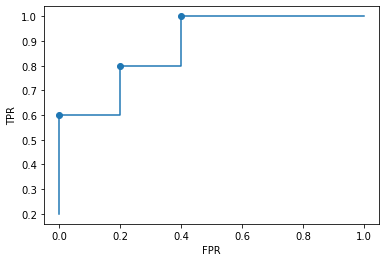

In [20]:
# plot fp as x, tp as y 
best_fp = np.array([fp_arr[2], fp_arr[4], fp_arr[6]])
best_tp = np.array([tp_arr[2], tp_arr[4], tp_arr[6]])
plt.scatter(best_fp, best_tp)
plt.plot(fp_arr, tp_arr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Exercise 4

#### Part 1

<img src="4dt.png" width="250">

#### Part 2

Calculating Gini index: $2p(1-p)$ by splitting first on each feature where $p$ is prop of correctly classified in a given branch and weighting by prop of observations for that branch:

For A: 
$$ Gini(A) = \frac{4}{8}\cdot (2\cdot1\cdot0) + \frac{4}{8} \cdot(2\cdot0.75\cdot0.25) $$
$$ Gini(A) = 0.1875$$ 

For B: 
$$ Gini(B) = \frac{4}{8}\cdot (2\cdot0.75\cdot0.25) + \frac{4}{8} \cdot(2\cdot0.5\cdot0.5) $$
$$ Gini(B) = 0.4375$$

For C: 
$$ Gini(C) = \frac{4}{8}\cdot (2\cdot0.75\cdot0.25) + \frac{4}{8} \cdot(2\cdot0.5\cdot0.5) $$
Given it is the same as for B:
$$ Gini(C) = 0.4375$$

Given feature A has the highest purity using the lowest Gini index value as a measure, we would split on A first. 

#### Part 3

Information gain is the difference between entropy of original and post-split where entropy is $H[p, 1-p] = -plog_2(p) - (1-p)log_2(1-p)$

Original Entropy $ = H[\frac{5}{8}, \frac{3}{8}] = 0.9544$

For A: 
$$ H(A) = (\frac{4}{8}H[1,0]+ \frac{4}{8}H[0.75,0.25]) $$
$$ H(A)= [0.5*0 + 0.5(-0.75log_2(0.75) - 0.25log_2(0.25))] $$
$$ H(A) = 0.4056 $$

$$ IG(A) = H(original) - H(A) $$
$$ IG(A) = 0.9544 - 0.4056 = 0.5488 $$

For B: 
$$H(B) = (\frac{4}{8}H[0.75,0.25]+ \frac{4}{8}H[0.5,0.5])$$
$$H(B)= [0.5 (-0.75log_2(0.75) - 0.25log_2(0.25)) + 0.5(1)]  $$
$$ H(B) = 0.9056 $$ 
$$ IG(B) = 0.9544 - 0.9056 = 0.0488 $$

For C: 
$$H(C) = (\frac{4}{8}H[0.75,0.25]+ \frac{4}{8}H[0.5,0.5]) $$
Since it's the same as for B: 
$$ IG(C) = 0.0488 $$

A has the greatest information gain, so the first split is consistent with 4.2

### Exercise 5

#### Part 1

**Processing data**

In [21]:
train = pd.read_csv('carseats_train.csv')
test = pd.read_csv('carseats_test.csv')

In [22]:
# make categorical data into indicator variables 
# shelveloc, urban, us for train and test 
def process_categorical_to_indicator(df):
    # get dummies
    shelve_dummy = pd.get_dummies(
        df['ShelveLoc'], 
        drop_first=True
    ).rename(columns=lambda x: 'ShelveLoc_' + str(x))
    urban_dummy = pd.get_dummies(
        df['Urban'],
        drop_first=True
    ).rename(columns=lambda x: 'Urban_' + str(x))
    us_dummy = pd.get_dummies(
        df['US'],
        drop_first=True
    ).rename(columns=lambda x: 'US_' + str(x))
    
    final_df = pd.concat(
        [df.drop(['ShelveLoc', 'Urban', 'US'], axis=1
                                 ).copy(), 
         shelve_dummy, urban_dummy, us_dummy], axis=1)
    
    return final_df

In [23]:
proc_train = process_categorical_to_indicator(train)
proc_test = process_categorical_to_indicator(test)

In [24]:
X_train = proc_train.drop(['Sales'],axis=1).copy()
X_test = proc_test.drop(['Sales'],axis=1).copy()
y_train = proc_train.loc[:,'Sales'].copy()
y_test = proc_test.loc[:,'Sales'].copy()

#### Part 2 

**CV function for tree-based methods**

In [25]:
def tree_cross_val_tune(X, y, fxn, param_vals, eval_fxn):
    ''' takes in data, fxn classifier, param values to tune, 
    and fxn to calc evaluation metric;
    returns df of k values and avg evaluation metric across folds ''' 
    
    kf = KFold(n_splits=5, shuffle=True, random_state=12)
    metrics = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
        
        for j in param_vals:
            # train for each param value 
            preds_ij = fxn(X_train, X_test, y_train, j)
            # calc evaluation 
            score = eval_fxn(y_test, preds_ij)
            # store metrics somehow 
            metrics.append([j, score])

    # report average f1 score across folds for each parameter value 
    metrics = pd.DataFrame(metrics, columns=['param', 'score'])
    # group by param and average across score 
    avg_metrics = metrics.groupby('param').mean().reset_index()
    
    
    return avg_metrics

**Tuning parameters for CART**

In [26]:
# sklearn decision tree function 
def decision_tree_predictions(X_train, X_test, y_train, max_depth):
    clf = tree.DecisionTreeClassifier(max_depth = max_depth)
    clf = clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    return np.array(preds)

In [27]:
dt_scores = tree_cross_val_tune(X_train, 
                                y_train, 
                                decision_tree_predictions, 
                                [2,3,4,5,6,7,8,9,10], 
                                calc_f1)
depth = dt_scores['param'][dt_scores.score == dt_scores.score.max()].values[0]

In [28]:
print('The best performing CART model is for a max depth of '+ str(depth) + ' with F1 score of ' + str(round(dt_scores.score.max(), 4)))
dt_scores

The best performing CART model is for a max depth of 7 with F1 score of 0.635


,param,score
0,2,0.538582
1,3,0.593627
2,4,0.580952
3,5,0.615748
4,6,0.633557
5,7,0.635000
6,8,0.577462
7,9,0.632832
8,10,0.604437


**Tuning parameters for GOSDT**

In [29]:
# extra processing
n_est = 40 
max_depth = 1 
X_train_guessed, thresholds, header, threshold_guess_time = compute_thresholds(
    X_train.copy(), y_train, n_est, max_depth)
X_test_guessed = cut(X_test.copy(), thresholds)
X_test_guessed = X_test_guessed[header]

In [30]:
# gosdt
def gosdt_predictions(X_train, X_test, y_train, reg):
    gosdt_tree = GOSDT({
            "depth_budget": 2,
            "regularization": reg,
            "verbose": False,
        })
    gosdt_tree = gosdt_tree.fit(X_train, y_train)
    preds = gosdt_tree.predict(X_test)
    return np.array(preds)

In [31]:
gosdt_scores = tree_cross_val_tune(X_train_guessed, 
                                   y_train, 
                                   gosdt_predictions, 
                                   [0.5, 0.3, 0.1, 0.01,0.005], 
                                   calc_f1)
reg = gosdt_scores['param'][gosdt_scores.score == gosdt_scores.score.max()].values[0]

gosdt reported successful execution
training completed. 0.000/0.000/0.000 (user, system, wall), mem=161976 MB
bounds: [0.864444..0.864444] (0.000000) loss=0.364444, iterations=0
gosdt reported successful execution
training completed. 0.000/0.000/0.000 (user, system, wall), mem=162116 MB
bounds: [0.664444..0.664444] (0.000000) loss=0.364444, iterations=0
gosdt reported successful execution
training completed. 0.000/0.000/0.000 (user, system, wall), mem=162244 MB
bounds: [0.448889..0.448889] (0.000000) loss=0.248889, iterations=0
gosdt reported successful execution
training completed. 0.000/0.000/0.000 (user, system, wall), mem=162308 MB
bounds: [0.268889..0.268889] (0.000000) loss=0.248889, iterations=0
gosdt reported successful execution
training completed. 0.000/0.000/0.000 (user, system, wall), mem=162312 MB
bounds: [0.258889..0.258889] (0.000000) loss=0.248889, iterations=0
gosdt reported successful execution
training completed. 0.000/0.000/0.000 (user, system, wall), mem=162328 MB


In [32]:
print('The best performing GOSDT model is for regularization of '+ str(reg) + ' with F1 score of ' + str(round(gosdt_scores.score.max(), 4)))

gosdt_scores

The best performing GOSDT model is for regularization of 0.005 with F1 score of 0.5262


,param,score
0,0.005,0.526223
1,0.010,0.526223
2,0.100,0.186717
3,0.300,0.000000
4,0.500,0.000000


#### Part 3

**KNN function**

In [33]:
def euclid_dist(x, y):
    return np.sqrt(((x-y)**2).sum())

In [34]:
def manhattan_dist(x, y):
    return np.abs(x - y).sum()

In [35]:
def knn_predictions(X_train, X_test, y_train, num_neighbors, distance_metric='euclidean'):
    distance_fxn = (euclid_dist if distance_metric=='euclidean' else manhattan_dist)
    y_train = np.array(y_train)
    predictions = []
    for idx, row in X_test.iterrows():
        test_i = np.array(row)
        # calc distances between x train 
        distances = [distance_fxn(np.array(train_i), test_i) 
                     for i, train_i in X_train.iterrows()]
        distances = np.array(distances)
        
        # sort indices by ascending value
        asc_idx = np.argsort(distances)
        
        # find n nearest neighbors 
        idx_neighbors = asc_idx[:num_neighbors]
        
        # take majority vote 
        y_neighbors = y_train[idx_neighbors]
        
        majority = y_neighbors.mean()
        
        predictions.append((1 if majority >= 0.5 else 0))
        
    return np.array(predictions)

**KNN CV Function**

In [36]:
def knn_cross_val_tune(X, y, fxn, param_vals, eval_fxn):
    ''' takes in data, fxn classifier, param values to tune, 
    and fxn to calc evaluation metric;
    returns df of k values and avg evaluation metric across folds ''' 
    
    kf = KFold(n_splits=5, shuffle=True, random_state=12)
    metrics = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = np.array(y.iloc[train_index]), np.array(y.iloc[test_index])
        
        for j in param_vals:
            preds_ij_man = fxn(X_train, X_test, y_train, j, 'manhattan_dist')
            preds_ij_euc = fxn(X_train, X_test, y_train, j)

            score_man = eval_fxn(y_test, preds_ij_man)
            score_euc = eval_fxn(y_test, preds_ij_euc)

            metrics.append([j, 'manhattan', score_man])
            metrics.append([j, 'euclidean', score_euc])
                
    metrics = pd.DataFrame(metrics, columns=['param', 'distance', 'score'])
    avg_metrics = metrics.groupby(['param', 'distance']).mean().reset_index()
    
    
    return avg_metrics

**Tuning KNN**

In [37]:
# use cross_val_tune and knn function to tune knn (num_neighbors, distance) 
knn_scores = knn_cross_val_tune(X_train, 
                                y_train, 
                                knn_predictions, 
                                [1,3,5,7,9,11, 13, 15, 17, 19, 25],
                                calc_f1)
knn_metric = knn_scores['distance'][knn_scores.score == knn_scores.score.max()].values[0]
nn = knn_scores['param'][knn_scores.score == knn_scores.score.max()].values[0]

In [38]:
print('The best performing KNN model is for '+ str(nn) + ' nearest neighbors and ' + knn_metric + ' distance metric with F1 score of ' + str(round(knn_scores.score.max(), 4)))
knn_scores

The best performing KNN model is for 1 nearest neighbors and manhattan distance metric with F1 score of 0.453


,param,distance,score
0,1,euclidean,0.431348
1,1,manhattan,0.453013
2,3,euclidean,0.379023
3,3,manhattan,0.394998
4,5,euclidean,0.356234
5,5,manhattan,0.354113
6,7,euclidean,0.373473
7,7,manhattan,0.427906
8,9,euclidean,0.361911
9,9,manhattan,0.444358


#### Part 4

For each model, taking the tuned parameters with the best performance and fitting the model and predicting on the test set, it appears that CART performs the best with the highest test F1 score. 

In [39]:
knn_preds = knn_predictions(X_train, X_test, y_train, nn, distance_metric=knn_metric)
dt_preds = decision_tree_predictions(X_train, X_test, y_train, depth)
gosdt_preds = gosdt_predictions(X_train, X_test, y_train, reg)
print('KNN F1 test score using ' + str(nn) + ' nearest neighbors and ' + knn_metric + ' distance metric: ' + str(round(calc_f1(y_test, knn_preds),4)))
print('CART F1 score using' + ' max depth of ' + str(depth) +': ' + str(round(calc_f1(y_test, dt_preds),4)))
print('GOSDT F1 score using' + ' regularization of ' + str(reg) +': ' + str(round(calc_f1(y_test, gosdt_preds),4)))

gosdt reported successful execution
training completed. 0.001/0.000/0.000 (user, system, wall), mem=163328 MB
bounds: [0.286596..0.286596] (0.000000) loss=0.276596, iterations=0
KNN F1 test score using 1 nearest neighbors and manhattan distance metric: 0.5536
CART F1 score using max depth of 7: 0.7156
GOSDT F1 score using regularization of 0.005: 0.5412


#### Part 5

For K-fold cross-validation, it splits the dataset into k equal folds. It will train k times and for each time, it will alternate which fold is the test fold and train on the k-1 folds. The evaluation metric will be calculated on the test fold each time. 

For LOOCV, it trains n times for n observations. Each iteration, it cycles and alternatively leaves one point out. It trains on n-1 observations, and uses the left-out point as the test set to calculate the evaulation metric. 

In terms of disadvantages, LOOCV is computationally expensive since it requires going through every data point and alternating which point is left out (this is especially disadvantageous when n is large or many features). Also, since LOOCV trains each time with n-1 observations for n times, the resulting model is highly dependent on the training set and can lead to high variance in its performance when generalizing. 

#### Part 6

In [40]:
(train.Sales == 1).sum() / len(train)

0.3723404255319149

In [41]:
(train.Sales == 0).sum() / len(train)

0.6276595744680851

Sales with values of 1 comprises about 37% of the training dataset, while values of 0 makes up the other 63%. Because of the imbalance in the dataset, F1 would be a better evaluation than accuracy.

### Exercise 6 

#### Part 1

We can prove $NN \xrightarrow{p} x_{test}$ if for any $ \epsilon > 0$:
$$ \lim_{n \to \infty} P(\rho(NN, x_{test}) > \epsilon) = 0$$ 

If the distance between a point and its nearest neighbor is greater than some value, then every point must also be greater than that value. Since the points are iid, the above can be written as:
$$ \lim_{n \to \infty} \prod_{j=1}^{n} P(\rho(x_j, x_{test}) > \epsilon) = 0$$ 

$$ = \lim_{n \to \infty} \prod_{j=1}^{n} P(  \sum_{i=1}^{d} I(x_j \neq x_{test}) > \epsilon)$$ 

When $\epsilon > d$, since the max value of $\rho(x_j, x_{test}) $ is d:
$$ P(  \sum_{i=1}^{d} I(x_j \neq x_{test}) > \epsilon) = 0 $$ 

When $\epsilon <= d$:
$$ \lim_{n \to \infty} \prod_{j=1}^{n} P(\rho(x_j, x_{test}) > \epsilon) = \lim_{n \to \infty} (P(\rho(x_j, x_{test}) > \epsilon))^n $$
Since by definition, probability is a proportion between 0 and 1, 
$$ \lim_{n \to \infty} (0 \leq P(\rho(x_j, x_{test}) > \epsilon) < 1)^n  = 0$$

Since we have proven $ \lim_{n \to \infty} \prod_{j=1}^{n} P(\rho(x_j, x_{test}) > \epsilon) = 0$ for any $\epsilon > 0$, 
by definition of probability convergence, $NN \xrightarrow{p} x_{test}$


#### Part 2

Given the result in 6.1:
$$NN \xrightarrow{p} x_{test}$$
Given $f$ is a Lipschitz function and therefore continuous, by CMT:
$$ f(NN) \xrightarrow{p} f(x_{test}) $$
$$ f(NN) - f(x_{test})\xrightarrow{p} 0 $$


By CMT again:
$$ | f(NN) - f(x_{test}|\xrightarrow{p} 0 $$

#### Part 3 

$$ K' = \mathbb{E}[\rho(x_{test}, x) \leq 2]$$
$$ = n \cdot [(P(\rho(x_{test}, x) = 0) + (P(\rho(x_{test}, x) = 1)) + (P(\rho(x_{test}, x) = 2))] $$

$$ = n \cdot [\binom{d}{0} \frac{1}{2^d} + \binom{d}{1} \frac{1}{2^d} + \binom{d}{2} \frac{1}{2^d}] $$
$$ K' = \frac{n}{2^d} \cdot ( 1 + d + \frac{d \cdot (d-1)}{2}) $$

$$ K' = \frac{n(2 + d + d^2)}{2^{d+1}}$$

#### Part 4

As $d \to \infty$ and for a fixed $n, K' \to 0$, the numerator grows by a polynomial, and the denominator grows exponentially. 

#### Part 5

As the number of features increase (ie d), points become further apart and the expected number of points within a given distance goes to 0 (ie K'). Therefore, the predictions from KNN will not be very good since there are essentially no close neighbors for a test point from which to take a majority vote. 